In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tarfile
import os

# Step 1: Extract the .gz tar archive
file_path = "/content/drive/MyDrive/Movie_reviews.gz"
extract_path = "/content/aclImdb_extracted"

with tarfile.open(file_path, "r:gz") as tar:
    tar.extractall(path=extract_path)

# Step 2: Load data from pos/ and neg/ folders
import glob

def load_reviews_from_folder(folder_path, sentiment_label):
    texts = []
    for filename in glob.glob(os.path.join(folder_path, "*.txt")):
        with open(filename, 'r', encoding='utf-8') as file:
            texts.append((file.read(), sentiment_label))
    return texts

# Collect positive and negative reviews
pos_reviews = load_reviews_from_folder(os.path.join(extract_path, "aclImdb/train/pos"), 1)
neg_reviews = load_reviews_from_folder(os.path.join(extract_path, "aclImdb/train/neg"), 0)

# Step 3: Create a DataFrame
import pandas as pd

all_reviews = pos_reviews + neg_reviews
df = pd.DataFrame(all_reviews, columns=["review", "sentiment"])

df.head()


,review,sentiment
0,The movie was gripping from start to finish an...,1
1,It got to be a running joke around Bonanza abo...,1
2,This is an interesting true story of Archie Gr...,1
3,Uneven Bollywood drama. Karisma Kapoor is exce...,1
4,Extremely well-conceived - part whatever happe...,1


In [ ]:
# Show dataset info
df.info()

# Check for missing values
print(df.isnull().sum())

# Basic statistics (for numeric columns, if any)
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   review          25000 non-null  object
 1   sentiment       25000 non-null  int64 
 2   cleaned_review  25000 non-null  object
dtypes: int64(1), object(2)
memory usage: 586.1+ KB
review            0
sentiment         0
cleaned_review    0
dtype: int64


,sentiment
count,25000.00000
mean,0.50000
std,0.50001
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [ ]:
print(df.columns)


Index(['review', 'sentiment', 'cleaned_review'], dtype='object')


In [ ]:
import re
import string

# Function to clean text
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"<.*?>", "", text)  # remove HTML tags
    text = re.sub(r"http\S+", "", text)  # remove URLs
    text = re.sub(r"[^\w\s]", "", text)  # remove punctuation
    text = re.sub(r"\d+", "", text)  # remove digits
    text = text.strip()
    return text

df['cleaned_review'] = df['review'].apply(clean_text)
df[['review', 'cleaned_review']].head()


,review,cleaned_review
0,The movie was gripping from start to finish an...,the movie was gripping from start to finish an...
1,It got to be a running joke around Bonanza abo...,it got to be a running joke around bonanza abo...
2,This is an interesting true story of Archie Gr...,this is an interesting true story of archie gr...
3,Uneven Bollywood drama. Karisma Kapoor is exce...,uneven bollywood drama karisma kapoor is excel...
4,Extremely well-conceived - part whatever happe...,extremely wellconceived part whatever happene...


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
from nltk.corpus import wordnet

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # default to noun


In [ ]:
import nltk

# Download the required NLTK data package
nltk.download('averaged_perceptron_tagger_eng')

# Your existing code using word_tokenize here...
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def advanced_lemmatize(text):
    tokens = word_tokenize(text)
    pos_tags = nltk.pos_tag(tokens)
    lemmatized_tokens = [
        lemmatizer.lemmatize(word, get_wordnet_pos(pos))
        for word, pos in pos_tags
    ]
    return " ".join(lemmatized_tokens)

df['advanced_lemmatized'] = df['cleaned_review'].apply(advanced_lemmatize)
df[['cleaned_review', 'advanced_lemmatized']].head()

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


,cleaned_review,advanced_lemmatized
0,this film resembles in many ways enemy of the ...,this film resemble in many way enemy of the st...
1,playwright sidney bruhl michael caine has had ...,playwright sidney bruhl michael caine have hav...
2,i was so surprised when i saw this film so muc...,i be so surprised when i saw this film so much...
3,in cold blood adapted by director richard broo...,in cold blood adapt by director richard brook ...
4,if you enjoy cleese all the british pythonesq...,if you enjoy cleese all the british pythonesqu...


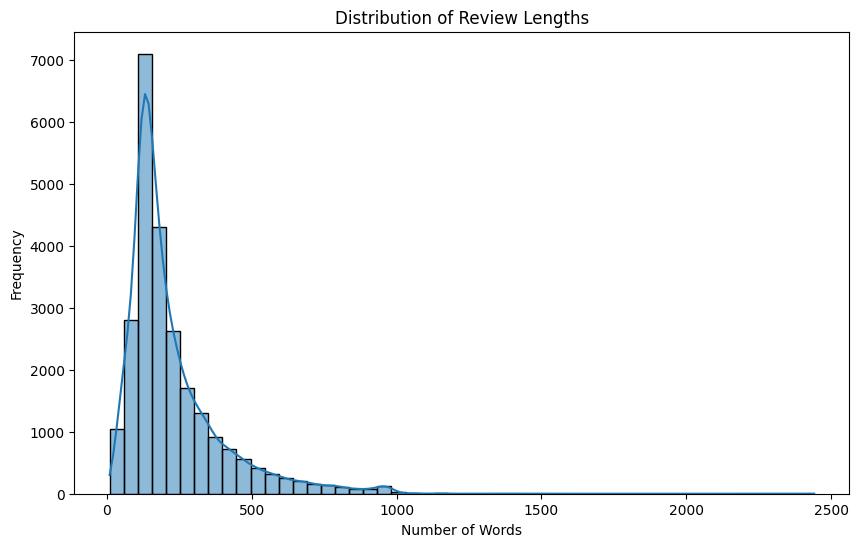

In [ ]:
# Length of each review
df['review_length'] = df['cleaned_review'].apply(lambda x: len(x.split()))

# Plotting distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['review_length'], bins=50, kde=True)
plt.title("Distribution of Review Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()


In [ ]:
from collections import Counter

# Combine all text
all_words = ' '.join(df['cleaned_review']).split()
word_freq = Counter(all_words)

# Top 20 most common words
print(word_freq.most_common(20))


[('the', 328121), ('and', 161575), ('a', 161309), ('of', 145166), ('to', 134822), ('is', 106799), ('in', 92187), ('it', 76313), ('this', 73186), ('i', 72475), ('that', 69198), ('was', 47988), ('as', 46058), ('with', 43724), ('for', 43701), ('movie', 41826), ('but', 40999), ('film', 37487), ('on', 33340), ('not', 30012)]


sentiment
1    12500
0    12500
Name: count, dtype: int64


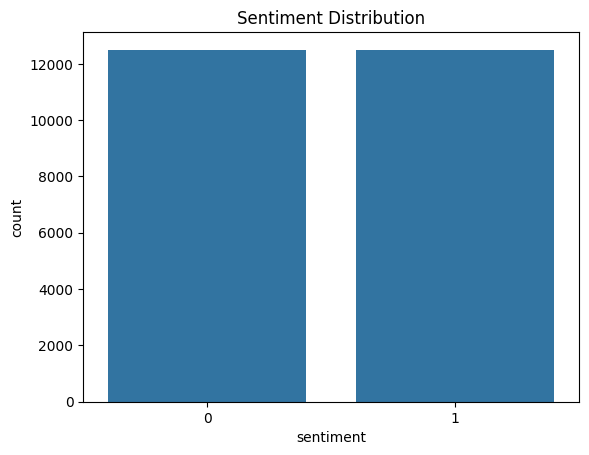

In [ ]:
# Check value counts
print(df['sentiment'].value_counts())

# Plot sentiment distribution
sns.countplot(x='sentiment', data=df)
plt.title("Sentiment Distribution")
plt.show()


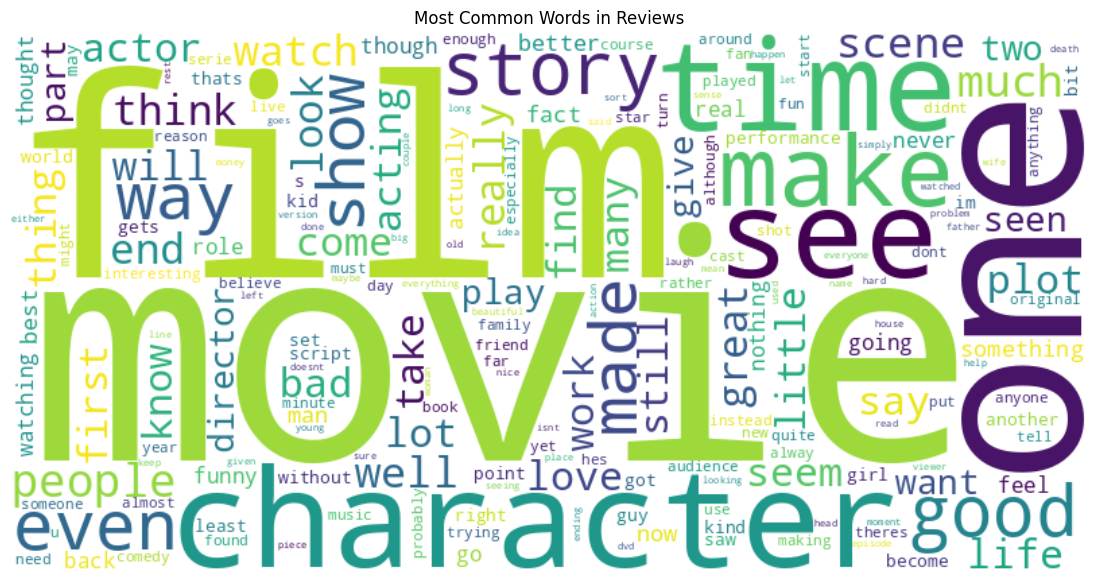

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['cleaned_review']))

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Reviews")
plt.show()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)

# Transform the cleaned reviews
X = tfidf.fit_transform(df['cleaned_review'])

# Labels (update 'sentiment' if your column has a different name)
y = df['sentiment']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Train a simple classifier
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8784

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88      2485
           1       0.87      0.89      0.88      2515

    accuracy                           0.88      5000
   macro avg       0.88      0.88      0.88      5000
weighted avg       0.88      0.88      0.88      5000



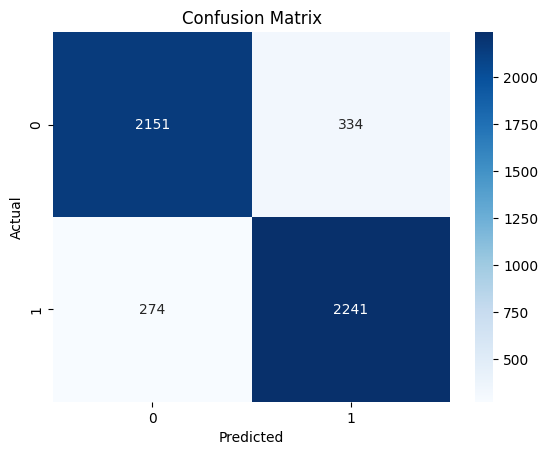

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_review'], df['sentiment'], test_size=0.2, random_state=42)

# Create pipeline
svm_model = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, ngram_range=(1, 2))),
    ('svc', LinearSVC())
])

# Train the model
svm_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = svm_model.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


SVM Accuracy: 0.8738

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87      2485
           1       0.88      0.87      0.87      2515

    accuracy                           0.87      5000
   macro avg       0.87      0.87      0.87      5000
weighted avg       0.87      0.87      0.87      5000



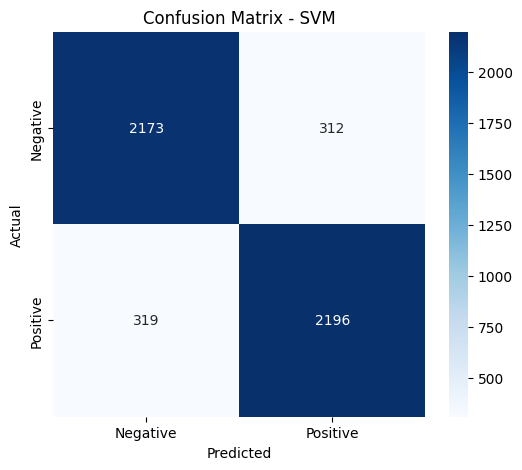

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM')
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, ngram_range=(1, 2))),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
])

rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print(classification_report(y_test, rf_preds))


Random Forest Accuracy: 0.8378
              precision    recall  f1-score   support

           0       0.83      0.84      0.84      2485
           1       0.84      0.84      0.84      2515

    accuracy                           0.84      5000
   macro avg       0.84      0.84      0.84      5000
weighted avg       0.84      0.84      0.84      5000



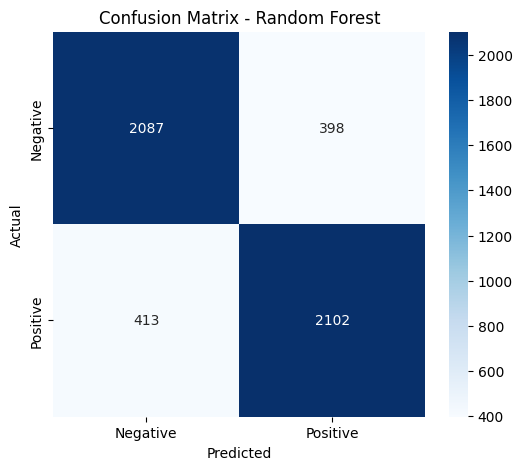

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm_rf = confusion_matrix(y_test, rf_preds)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()


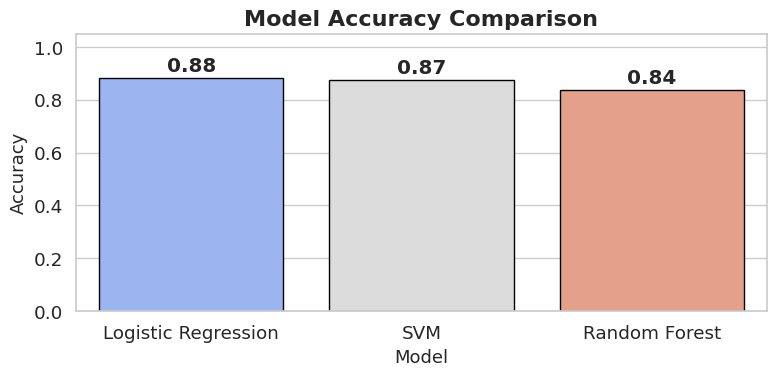

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(8, 4))

# Sort values for a cleaner plot
accuracy_df_sorted = accuracy_df.sort_values(by='Accuracy', ascending=False).reset_index()
accuracy_df_sorted.columns = ['Model', 'Accuracy']

# Plot bar chart
barplot = sns.barplot(
    x='Model',
    y='Accuracy',
    data=accuracy_df_sorted,
    palette='coolwarm',
    edgecolor='black',
    hue='Model',
    legend=False  # Disabling the legend
)

# Add value labels on top
for i, row in accuracy_df_sorted.iterrows():
    barplot.text(i, row['Accuracy'] + 0.01, f"{row['Accuracy']:.2f}", ha='center', va='bottom', fontweight='bold')

# Titles and labels
plt.title('Model Accuracy Comparison', fontsize=16, weight='bold')
plt.ylim(0, 1.05)
plt.ylabel('Accuracy', fontsize=13)
plt.xlabel('Model',fontsize=13)
plt.tight_layout()
plt.show()
